In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

c:\masterplanning\env\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\skitl\AppData\Local\Temp\ipykernel_20200\4156181521.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are 

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"kindergartens": kindergartens}

In [4]:
# services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
#             "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

c:\masterplanning\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
city_model.services_graph.nodes[17]

{'population': 6026.0,
 'is_living': True,
 'id': 17,
 'is_kindergartens_service': 1,
 'kindergartens_capacity': 245,
 'provision_kindergartens': 0,
 'id_kindergartens': 0,
 'population_prov_kindergartens': 0,
 'population_unprov_kindergartens': 6026.0}

In [7]:
# city_model.visualize()

In [8]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

12709.655
10459
9310.655
7060
7560.655000000001
5310
6325.655000000001
4075
5524.655000000001
3274
4792.655000000001
2542
4459.655000000001
2209
4218.655000000001
1968
4006.6550000000007
1756
3811.6550000000007
1561
3640.6550000000007
1390
3497.6550000000007
1247
3389.6550000000007
1139
3281.6550000000007
1031
3196.6550000000007
946
3116.6550000000007
866
3036.6550000000007
786
2956.6550000000007
706
2878.6550000000007
628
2803.6550000000007
553
2728.6550000000007
478
2653.6550000000007
403
2583.6550000000007
333
2514.6550000000007
264
2449.6550000000007
199
2386.6550000000007
136
2326.6550000000007
76
2278.6550000000007
28
2250.6550000000007
-2
kindergartens


In [9]:
city_model.blocks

PolygonGeoJSON[CityBlockFeature](epsg=32636, features=[PolygonFeature[CityBlockFeature](geometry=PolygonGeometry(type='Polygon', coordinates=[((344943.7190215524, 6647610.513779042), (344959.2049636124, 6647572.912402677), (344959.2601146289, 6647572.7655649055), (344961.79448212887, 6647565.315551608), (344961.79530412174, 6647565.313145321), (344961.80520475615, 6647565.28428239), (344961.80603286903, 6647565.281878189), (344963.2850622409, 6647561.005583072), (344963.29174268176, 6647560.982566305), (344963.2936687762, 6647560.958677184), (344963.3779891829, 6647558.143699831), (344943.7190215524, 6647610.513779042))]), properties=CityBlockFeature(landuse='buildings', block_id=0, is_living=False, current_population=0.0, floors=nan, current_living_area=0.0, current_green_capacity=0.0, current_green_area=0.0, current_parking_capacity=0.0, current_industrial_area=0.0, area=41.13090686526016)), PolygonFeature[CityBlockFeature](geometry=PolygonGeometry(type='Polygon', coordinates=[((3449

In [10]:

services_prov["kindergartens"]["population_prov_kindergartens"].sum()


10459

In [11]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

2306

In [12]:
services_prov["kindergartens"]['population'].sum()

208355

In [13]:
services_prov["kindergartens"][services_prov["kindergartens"]['population'] > 0]

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area,provision_kindergartens,population_prov_kindergartens,population_unprov_kindergartens,population
15,"POLYGON ((344864.533 6647854.355, 344855.596 6...",buildings,15,True,3375.0,1.0,11360.040,0.0,0.0,3004.0,3427.28270,65429.054626,100,206,0,3375
16,"POLYGON ((344272.022 6648285.316, 344278.598 6...",buildings,16,True,3946.0,3.5,19338.336,4095.0,1900.0,44.0,7108.81950,102276.415413,100,241,0,3946
17,"POLYGON ((344477.431 6648686.065, 344490.134 6...",buildings,17,True,6026.0,2.0,32985.934,71444.0,43427.0,2911.0,30788.58880,338912.554925,69,255,112,6026
18,"POLYGON ((344059.128 6648753.606, 344059.172 6...",buildings,18,True,4222.0,1.0,19467.875,12479.0,11708.0,128.0,8921.20723,158850.983702,98,254,3,4222
20,"POLYGON ((344542.320 6648943.596, 344542.403 6...",buildings,20,True,5956.0,9.0,31287.166,41360.0,7509.0,0.0,6385.50440,248549.074482,70,255,108,5956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,"POLYGON ((347453.321 6648682.033, 347460.150 6...",selected_area,346,True,34.0,0.0,234.938,0.0,0.0,0.0,8543.41300,12372.147877,100,3,0,34
350,"POLYGON ((347767.514 6648786.017, 347767.265 6...",selected_area,350,True,81.0,4.0,1164.096,0.0,0.0,0.0,4244.02400,7699.668651,100,5,0,81
578,"POLYGON ((345759.141 6646404.365, 345765.205 6...",no_dev_area,578,True,514.0,0.0,4275.080,0.0,0.0,0.0,2354.81730,45802.171771,100,32,0,514
587,"POLYGON ((346705.434 6646947.258, 346717.592 6...",no_dev_area,587,True,72.0,2.0,662.390,11861.0,2153.0,0.0,42521.46270,87752.190003,100,5,0,72


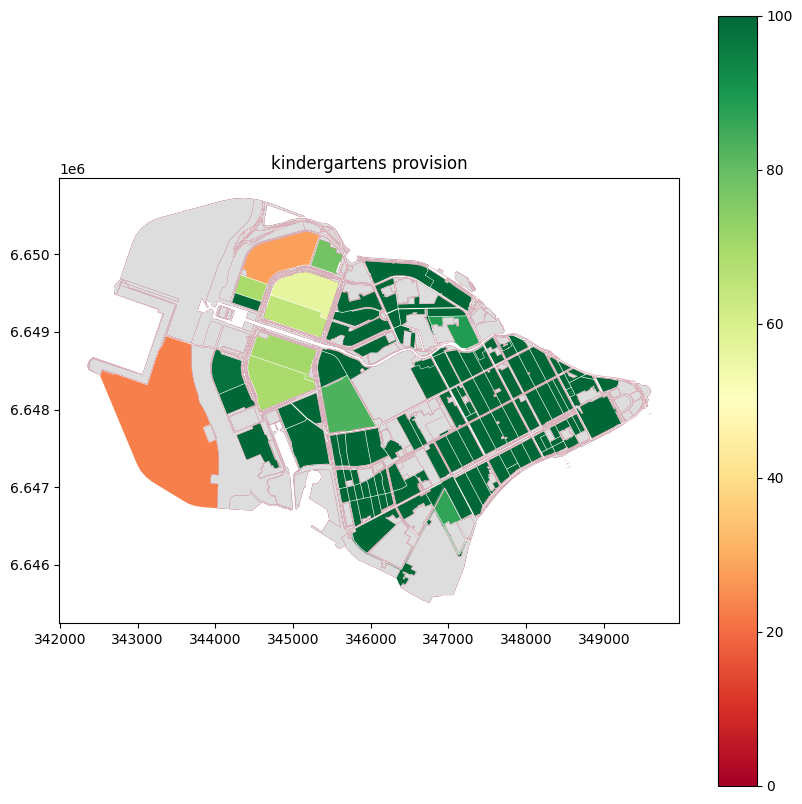

In [14]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()


In [15]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# def show_me_chart(fig, gs, prov, name, i):
#   ax = fig.add_subplot(gs[i//3, i%3])
#   prov.plot(column="provision_"+name, legend=True, ax=ax, cmap='RdYlGn')
#   ax.set_title(name +" provision")
#   prov[prov["population"] == 0].plot(ax=ax, color="#ddd", alpha=1)


# kindergartens_prov = services_prov["kindergartens"]
# schools_prov = services_prov["schools"]
# recreational_areas_prov = services_prov["recreational_areas"]
# hospitals_prov = services_prov["hospitals"]
# pharmacies_prov = services_prov["pharmacies"]
# policlinics_prov = services_prov["policlinics"]

# fig = plt.figure(figsize=(25, 15))
# gs = GridSpec(2, 3, figure=fig)

# i = 0
# for service_type in services_prov:
#   show_me_chart(fig, gs, services_prov[service_type], service_type, i)
#   i = i+1

# plt.show()

In [16]:
# df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]
# kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)

# df_filtered_2 = services_prov["schools"][services_prov["schools"]["provision_schools"] > 0]
# schools_all = df_filtered_2["provision_schools"].sum(numeric_only=True) / len(df_filtered_2)

# df_filtered_3 = services_prov["recreational_areas"][
#     services_prov["recreational_areas"]["provision_recreational_areas"] > 0
# ]
# recreational_areas_all = df_filtered_3["provision_recreational_areas"].sum(numeric_only=True) / len(df_filtered_3)
# total_prov = (kindergartens_all + schools_all + recreational_areas_all) / 3

# print(f"Total provision before {total_prov}")

In [17]:
df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]
kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)
print(f"Total provision before {kindergartens_all}")

Total provision before 96.96850393700787
